A nice API and tutorial: https://dev.socrata.com/foundry/data.cityofchicago.org/ijzp-q8t2

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
import kuaizi
kuaizi.set_matplotlib(style='nature', usetex=False)

In [6]:
df = pd.read_csv('Crimes_-_2001_to_Present.csv') # Slow!!!!

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370519 entries, 0 to 7370518
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

### Whole Chicago since 2013

In [82]:
dff = df.loc[df['Year'] > 2013]

In [83]:
dff['Date'] = pd.to_datetime(dff['Date'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

In [87]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])

In [100]:
month_df.to_pickle('Crime-2013-2021-month-df.pkl')
piv.to_pickle('Crime-2013-2021-pivot.pkl')

### Look at Distrct 2

In [103]:
dff = df.loc[(df['Year'] > 2013) & (df['District'] == 2)]

In [105]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

Text(0.5, 1.0, 'Monthly Variation in Case Number (Chicago, District 2)')

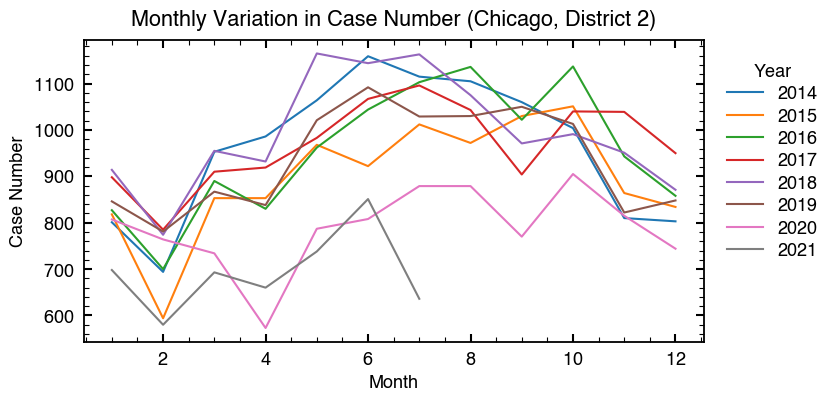

In [112]:
fig, ax = plt.subplots(figsize=(8, 4))
piv.plot(ax=ax, ylabel='Case Number')
lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Monthly Variation in Case Number (Chicago, District 2)')

Text(0.5, 1.0, 'Annual Case Number in Chicago (District 2)')

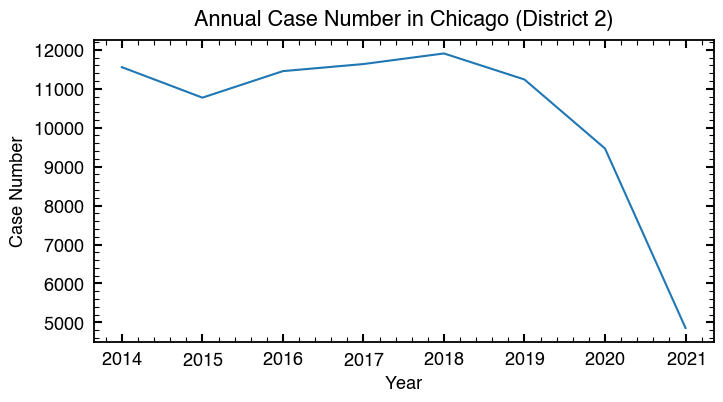

In [113]:
fig, ax = plt.subplots(figsize=(8, 4))

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual Case Number in Chicago (District 2)')

### Look at Distrct 2, Beat 0235

In [116]:
dff = df.loc[(df['Year'] > 2013) & (df['Beat'] == 235)]

In [118]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

Text(0.5, 1.0, 'Annual Case Number in Chicago (Beat 0235)')

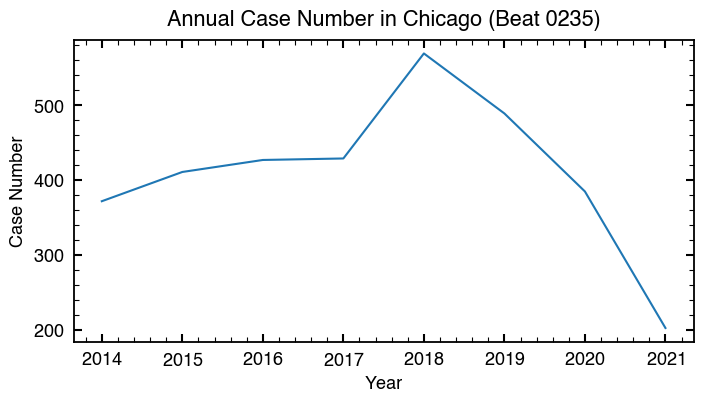

In [119]:
fig, ax = plt.subplots(figsize=(8, 4))

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual Case Number in Chicago (Beat 0235)')

Text(0.5, 1.0, 'Monthly Variation in Case Number (Chicago, Beat 0235)')

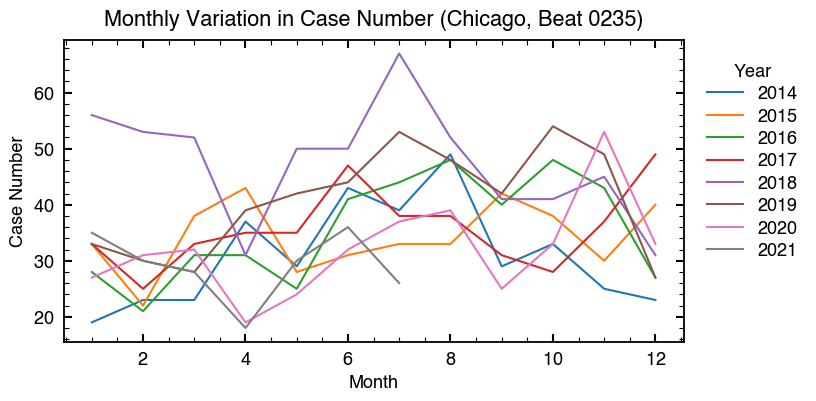

In [120]:
fig, ax = plt.subplots(figsize=(8, 4))
piv.plot(ax=ax, ylabel='Case Number')
lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Monthly Variation in Case Number (Chicago, Beat 0235)')

### Look at Distrct 2, violent crime

In [126]:
np.unique(dff['Primary Type'])

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING',
       'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [127]:
violent_crime = ['HOMICIDE', 'ASSAULT', 'CRIM SEXUAL ASSAULT', 
                 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'KIDNAPPING', 'ROBBERY']

In [180]:
dff = df.loc[(df['Year'] > 2013) & (df['Beat'] == 235) & (~df['Domestic'])]

violence_mask = np.logical_or.reduce([dff['Primary Type'] == item for item in violent_crime])
dff = dff.loc[violence_mask]

In [181]:
dff

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
19556,10255911,HY443656,09/29/2015 09:54:00 PM,056XX S KIMBARK AVE,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,True,False,...,5.0,41.0,03,1185626.0,1867848.0,2015,02/10/2018 03:50:01 PM,41.792515,-87.594867,"(41.792515268, -87.594866749)"
23464,10262758,HY450349,10/05/2015 12:15:00 PM,012XX E MIDWAY PLAISANCE,0325,ROBBERY,VEHICULAR HIJACKING,VEHICLE NON-COMMERCIAL,True,False,...,5.0,41.0,03,1185400.0,1865924.0,2015,02/10/2018 03:50:01 PM,41.787241,-87.595756,"(41.787240979, -87.595755974)"
28530,10271047,HY459056,10/11/2015 10:30:00 PM,057XX S WOODLAWN AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,5.0,41.0,02,1185201.0,1867241.0,2015,02/10/2018 03:50:01 PM,41.790860,-87.596444,"(41.790859618, -87.596444222)"
61716,10326499,HY516976,11/27/2015 07:35:00 PM,055XX S KIMBARK AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,5.0,41.0,03,1185607.0,1868594.0,2015,02/10/2018 03:50:01 PM,41.794563,-87.594913,"(41.794562798, -87.594912923)"
63349,10329016,HY519701,11/30/2015 01:33:00 PM,012XX E 55TH ST,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,CHA PARKING LOT/GROUNDS,True,False,...,5.0,41.0,04A,1185294.0,1868777.0,2015,02/10/2018 03:50:01 PM,41.795072,-87.596055,"(41.795072337, -87.596054915)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343152,12392004,JE262758,06/11/2021 10:46:00 PM,016XX E 56TH ST,0320,ROBBERY,STRONG ARM - NO WEAPON,APARTMENT,False,False,...,5.0,41.0,03,1188348.0,1868196.0,2021,06/18/2021 04:49:43 PM,41.793406,-87.584875,"(41.79340561, -87.5848746)"
7353159,12410800,JE285960,06/13/2021 12:00:00 AM,057XX S MARYLAND AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,...,5.0,41.0,02,1182885.0,1867037.0,2021,07/03/2021 04:47:57 PM,41.790354,-87.604943,"(41.790353984, -87.604942686)"
7363955,12423600,JE301651,07/14/2021 05:00:00 AM,056XX S MARYLAND AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,...,5.0,41.0,02,1182875.0,1867708.0,2021,07/21/2021 05:20:10 PM,41.792195,-87.604959,"(41.792195498, -87.604958508)"
7364943,12424644,JE302955,07/16/2021 12:30:00 AM,016XX E 56TH ST,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,APARTMENT,False,False,...,5.0,41.0,03,1188348.0,1868196.0,2021,07/23/2021 05:04:15 PM,41.793406,-87.584875,"(41.79340561, -87.5848746)"


In [182]:
dff['Date'] = pd.to_datetime(dff['Date'])
dff['YM'] = dff.Date.dt.to_period("M")
month_df = dff.groupby('YM')['Case Number'].count().to_frame()
month_df['Year'] = month_df.index.year
month_df['Month'] = month_df.index.month

In [183]:
piv = pd.pivot_table(month_df, index=['Month'], columns=['Year'], values=['Case Number'])['Case Number']

Text(0.5, 1.0, 'Monthly Variation in Violent Crimes (Chicago, District 2)')

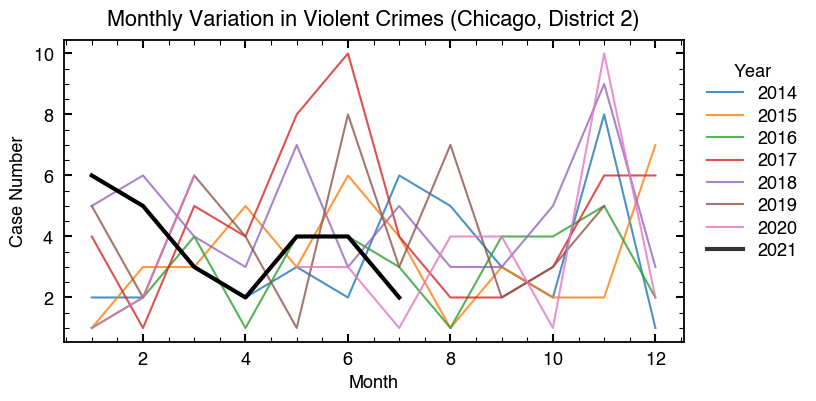

In [184]:
fig, ax = plt.subplots(figsize=(8, 4))
piv.plot(ax=ax, ylabel='Case Number', alpha=0.8)

ln = ax.get_lines()[-1]
ln.set_linewidth(3)
ln.set_alpha(1)
ln.set_color('k')

lgd = ax.get_legend()
lgd.set_bbox_to_anchor([1, 1])
lgd.get_lines()[-1].set_linewidth(3)
lgd.get_lines()[-1].set_color('k')

ax.ticklabel_format(useOffset=False, style='plain')

#ax.legend([ln], ['2021'])

plt.title('Monthly Variation in Violent Crimes (Chicago, District 2)')

Text(0.5, 1.0, 'Annual Violent Crimes in Chicago (District 2)')

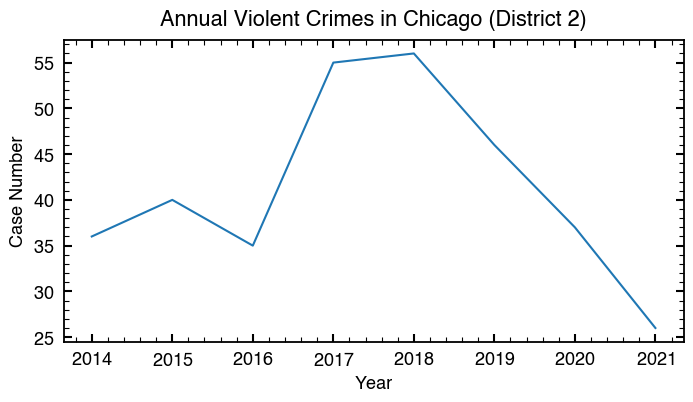

In [185]:
fig, ax = plt.subplots(figsize=(8, 4))

month_df.groupby('Year').sum()['Case Number'].plot(ylabel='Case Number', ax=ax)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Annual Violent Crimes in Chicago (District 2)')